In [54]:
import pandas as pd

In [55]:
# load data

meta_data = pd.read_csv('datasets/25Ktracks_with_genre_all.csv')
feature_data = pd.read_csv('../feature_extraction/features/all_features_medium_with_var.csv')

In [56]:
meta_data.head()

,Unnamed: 0,track_id,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,...,depth_1_genre_id,depth_2_genre_id,depth_3_genre_id,depth_4_genre_id,depth_5_genre_id,depth_1_genre_name,depth_2_genre_name,depth_3_genre_name,depth_4_genre_name,depth_5_genre_name
0,0,2,0.0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4.0,1.0,<p></p>,6073.0,...,21.0,21.0,21.0,21.0,21.0,Hip-Hop,Hip-Hop,Hip-Hop,Hip-Hop,Hip-Hop
1,1,3,0.0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4.0,1.0,<p></p>,6073.0,...,21.0,21.0,21.0,21.0,21.0,Hip-Hop,Hip-Hop,Hip-Hop,Hip-Hop,Hip-Hop
2,2,5,0.0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4.0,1.0,<p></p>,6073.0,...,21.0,21.0,21.0,21.0,21.0,Hip-Hop,Hip-Hop,Hip-Hop,Hip-Hop,Hip-Hop
3,3,10,0.0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4.0,6.0,NaN,47632.0,...,10.0,10.0,10.0,10.0,10.0,Pop,Pop,Pop,Pop,Pop
4,14,134,0.0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4.0,1.0,<p></p>,6073.0,...,21.0,21.0,21.0,21.0,21.0,Hip-Hop,Hip-Hop,Hip-Hop,Hip-Hop,Hip-Hop


In [57]:
feature_data.head()

,Unnamed: 0,track_id,tempo,rms_harmonic_mean,rms_harmonic_var,rms_percussive_mean,rms_percussive_var,spectral_centroid_mean,spectral_centroid_var,spectral_rolloff_mean,...,MFCC_11_var,MFCC_12_var,MFCC_13_var,MFCC_14_var,MFCC_15_var,MFCC_16_var,MFCC_17_var,MFCC_18_var,MFCC_19_var,MFCC_20_var
0,0,2,161.499023,0.060801,0.000606,0.102429,0.006546,2975.279504,932931.840925,6088.350559,...,87.048584,114.94784,75.481260,65.706130,53.539734,50.610130,53.584140,53.726870,53.249638,41.468660
1,1,3,86.132812,0.068484,0.001239,0.065604,0.002172,2758.702053,772835.021877,5681.876212,...,51.888680,64.36989,69.203100,68.990480,61.594390,52.908260,64.763330,48.977910,51.463720,43.103836
2,2,5,99.384014,0.079553,0.002230,0.085417,0.003846,2361.216888,709238.647097,5326.953068,...,98.111730,72.85849,89.889824,56.416400,56.527650,66.605540,45.467102,44.914455,65.224960,65.556360
3,3,10,112.347147,0.135624,0.000600,0.081036,0.003281,2319.325849,127330.196822,4256.393704,...,43.031660,35.30657,33.088593,31.829184,31.379726,46.397903,32.052837,46.061210,31.413872,32.891766
4,4,134,135.999178,0.088261,0.001123,0.094477,0.003812,2378.782197,897203.987271,4994.820480,...,74.750595,65.04158,55.827350,49.834393,56.149130,53.382088,54.343760,44.785503,42.397964,43.048054


In [58]:
# extract features that have been extracted by using librosa library
music_features = [feature for feature in feature_data.columns if feature not in ['Unnamed: 0', 'track_id']]


In [59]:
len(music_features)

74

In [60]:
meta_data.columns

Index(['Unnamed: 0', 'track_id', 'album_comments', 'album_date_created',
       'album_date_released', 'album_engineer', 'album_favorites', 'album_id',
       'album_information', 'album_listens', 'album_producer', 'album_tags',
       'album_title', 'album_tracks', 'album_type', 'artist_active_year_begin',
       'artist_active_year_end', 'artist_associated_labels', 'artist_bio',
       'artist_comments', 'artist_date_created', 'artist_favorites',
       'artist_id', 'artist_latitude', 'artist_location', 'artist_longitude',
       'artist_members', 'artist_name', 'artist_related_projects',
       'artist_tags', 'artist_website', 'artist_wikipedia_page', 'set_split',
       'set_subset', 'track_bit_rate', 'track_comments', 'track_composer',
       'track_date_created', 'track_date_recorded', 'track_duration',
       'track_favorites', 'track_genre_top', 'track_genres',
       'track_genres_all', 'track_information', 'track_interest',
       'track_language_code', 'track_license', 'trac

In [76]:
# define possible labels and extra features from the meta data
labels = ['depth_1_genre_name', 'depth_2_genre_name','depth_3_genre_name', 'depth_4_genre_name', 'depth_5_genre_name'] 
extra_features = ['artist_name', 'set_split', 'set_subset']

In [77]:
merged_df = pd.merge(meta_data, feature_data, on='track_id', how='left')

In [78]:
len(merged_df)

43005

In [79]:
# define final columns that are included in final dataset to create model.
final_columns = ['track_id'] + labels + extra_features + music_features
final_columns

['track_id',
 'depth_1_genre_name',
 'depth_2_genre_name',
 'depth_3_genre_name',
 'depth_4_genre_name',
 'depth_5_genre_name',
 'artist_name',
 'set_split',
 'set_subset',
 'tempo',
 'rms_harmonic_mean',
 'rms_harmonic_var',
 'rms_percussive_mean',
 'rms_percussive_var',
 'spectral_centroid_mean',
 'spectral_centroid_var',
 'spectral_rolloff_mean',
 'spectral_rolloff_var',
 'zero_crossings',
 'chroma_stft_0_mean',
 'chroma_stft_1_mean',
 'chroma_stft_2_mean',
 'chroma_stft_3_mean',
 'chroma_stft_4_mean',
 'chroma_stft_5_mean',
 'chroma_stft_6_mean',
 'chroma_stft_7_mean',
 'chroma_stft_8_mean',
 'chroma_stft_9_mean',
 'chroma_stft_10_mean',
 'chroma_stft_11_mean',
 'chroma_stft_0_var',
 'chroma_stft_1_var',
 'chroma_stft_2_var',
 'chroma_stft_3_var',
 'chroma_stft_4_var',
 'chroma_stft_5_var',
 'chroma_stft_6_var',
 'chroma_stft_7_var',
 'chroma_stft_8_var',
 'chroma_stft_9_var',
 'chroma_stft_10_var',
 'chroma_stft_11_var',
 'MFCC_1_mean',
 'MFCC_2_mean',
 'MFCC_3_mean',
 'MFCC_4_mea

In [80]:
final_df = merged_df[final_columns]

In [81]:
final_df

,track_id,depth_1_genre_name,depth_2_genre_name,depth_3_genre_name,depth_4_genre_name,depth_5_genre_name,artist_name,set_split,set_subset,tempo,...,MFCC_11_var,MFCC_12_var,MFCC_13_var,MFCC_14_var,MFCC_15_var,MFCC_16_var,MFCC_17_var,MFCC_18_var,MFCC_19_var,MFCC_20_var
0,2,Hip-Hop,Hip-Hop,Hip-Hop,Hip-Hop,Hip-Hop,AWOL,training,small,161.499023,...,87.048584,114.947840,75.481260,65.706130,53.539734,50.610130,53.584140,53.726870,53.249638,41.468660
1,3,Hip-Hop,Hip-Hop,Hip-Hop,Hip-Hop,Hip-Hop,AWOL,training,medium,86.132812,...,51.888680,64.369890,69.203100,68.990480,61.594390,52.908260,64.763330,48.977910,51.463720,43.103836
2,5,Hip-Hop,Hip-Hop,Hip-Hop,Hip-Hop,Hip-Hop,AWOL,training,small,99.384014,...,98.111730,72.858490,89.889824,56.416400,56.527650,66.605540,45.467102,44.914455,65.224960,65.556360
3,10,Pop,Pop,Pop,Pop,Pop,Kurt Vile,training,small,112.347147,...,43.031660,35.306570,33.088593,31.829184,31.379726,46.397903,32.052837,46.061210,31.413872,32.891766
4,134,Hip-Hop,Hip-Hop,Hip-Hop,Hip-Hop,Hip-Hop,AWOL,training,medium,135.999178,...,74.750595,65.041580,55.827350,49.834393,56.149130,53.382088,54.343760,44.785503,42.397964,43.048054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43000,155298,Folk,Singer-Songwriter,Singer-Songwriter,Singer-Songwriter,Singer-Songwriter,Greg Atkinson,training,medium,129.199219,...,80.172745,54.575260,112.987770,62.619858,49.619970,50.006454,50.158146,65.567490,81.833900,39.568230
43001,155306,Folk,Folk,Folk,Folk,Folk,Greg Atkinson,training,medium,103.359375,...,58.993520,82.817200,108.759140,68.722510,54.298910,56.095505,41.131850,35.043724,60.897583,55.925217
43002,155306,Folk,Singer-Songwriter,Singer-Songwriter,Singer-Songwriter,Singer-Songwriter,Greg Atkinson,training,medium,103.359375,...,58.993520,82.817200,108.759140,68.722510,54.298910,56.095505,41.131850,35.043724,60.897583,55.925217
43003,155307,Experimental,Avant-Garde,Avant-Garde,Avant-Garde,Avant-Garde,AWOTT,training,medium,117.453835,...,81.952720,81.642800,104.186100,73.546265,239.670580,197.069370,90.075540,57.600407,88.707726,54.907215


<Axes: >

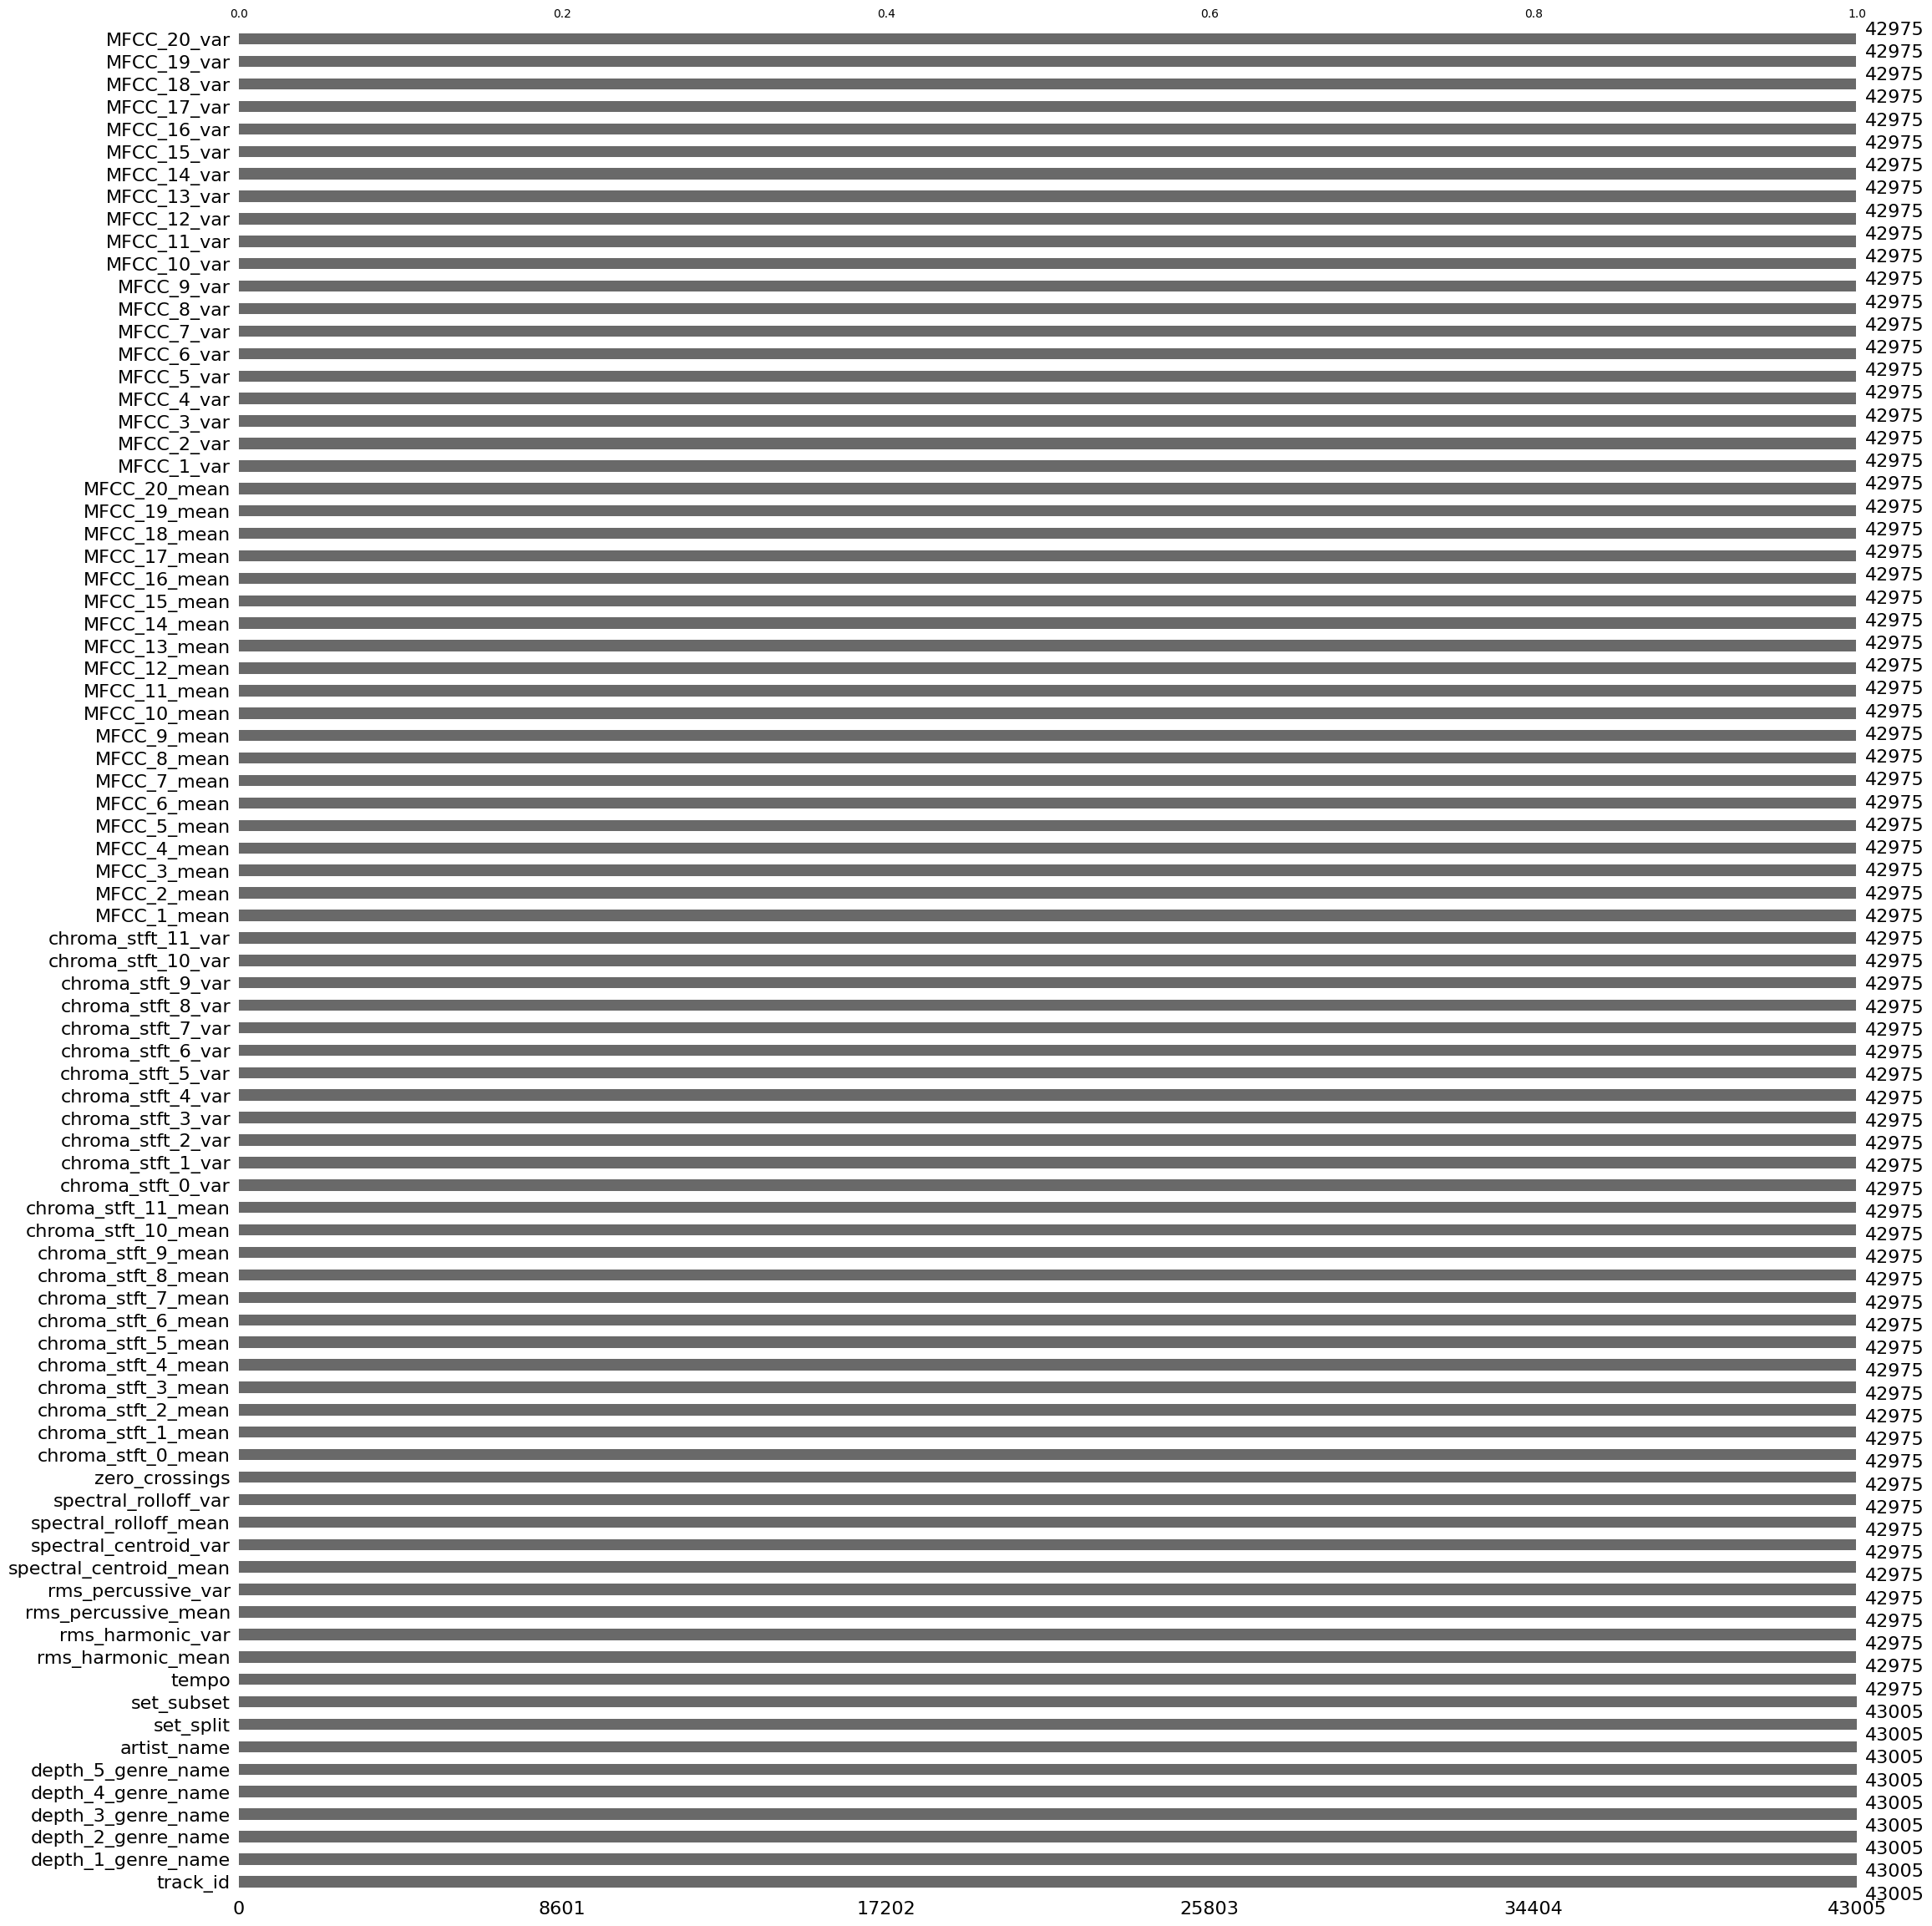

In [82]:
# check null values
import missingno as mno
mno.bar(final_df)

In [70]:
final_df.dropna(inplace=True)

/var/folders/np/f11s751j4dj_y_1cj4yxydpwpsr474/T/ipykernel_75342/2709626079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.dropna(inplace=True)


<Axes: >

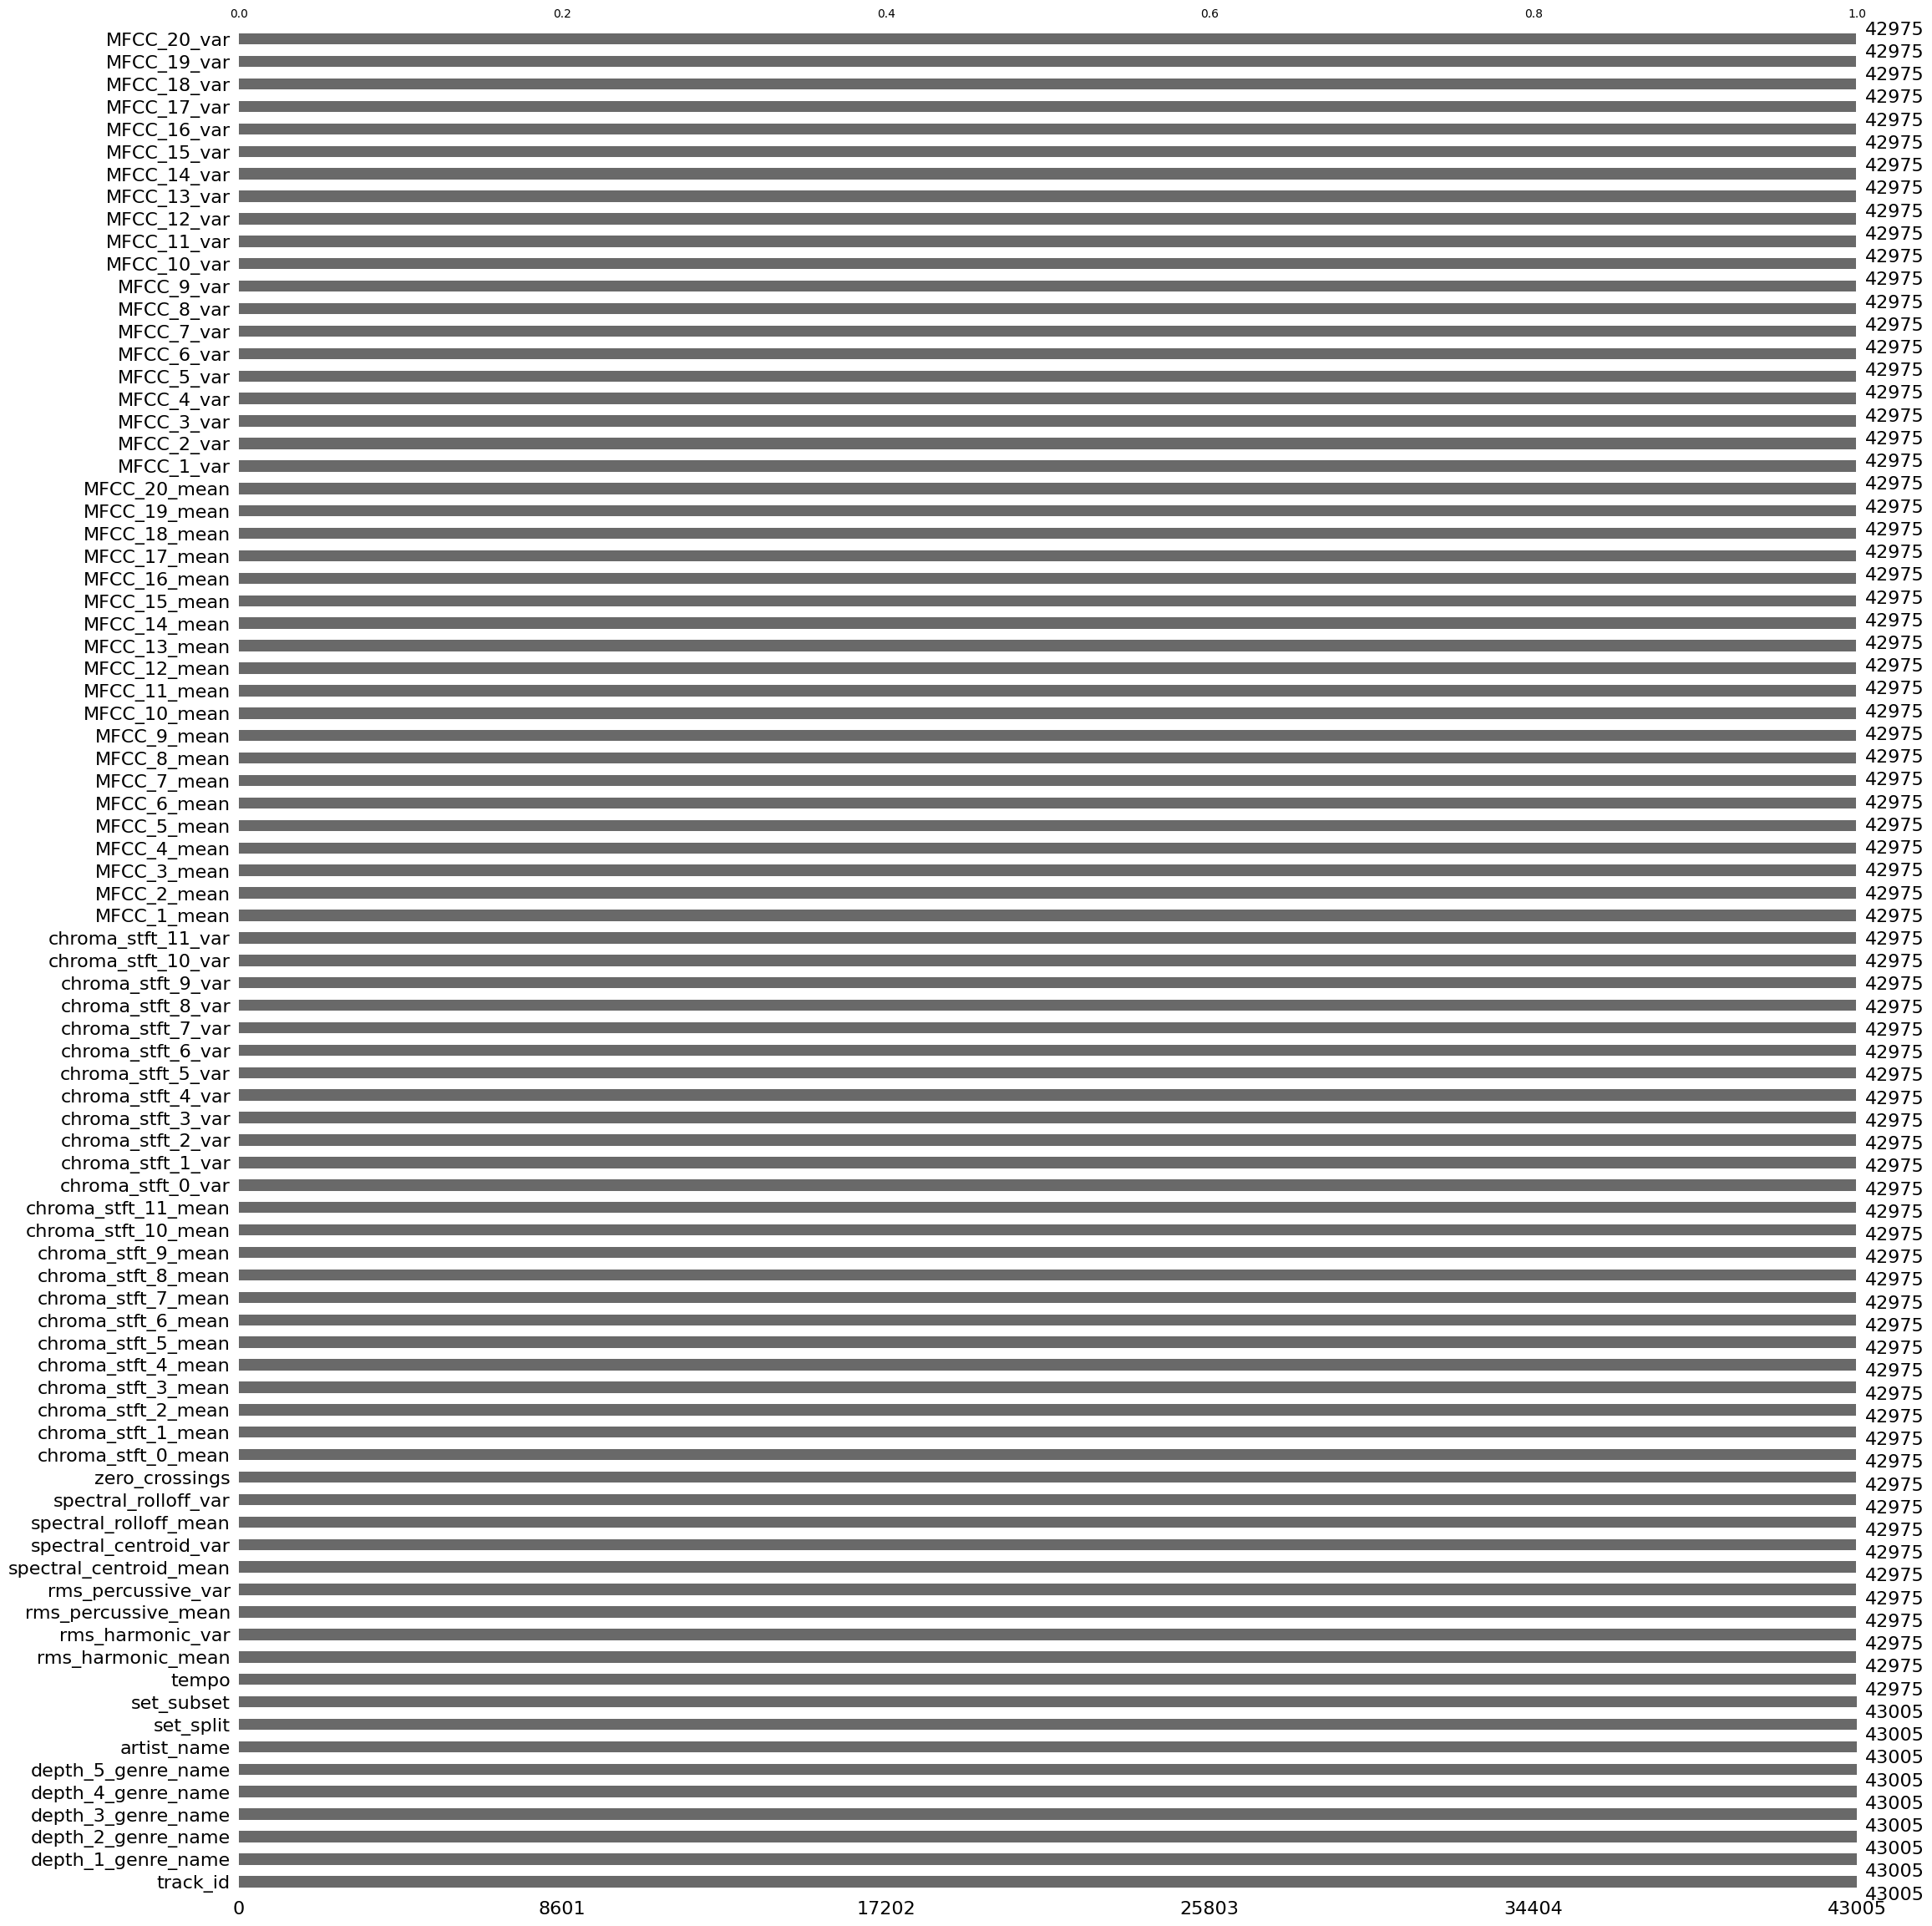

In [83]:
mno.bar(final_df)

In [84]:
final_df_training = final_df[final_df['set_split'] == 'training']
final_df_test = final_df[final_df['set_split'] == 'test']
final_df_validate = final_df[final_df['set_split'] == 'validation']

In [85]:
len(final_df_training)

34316

In [86]:
len(final_df_test)

4255

In [87]:
len(final_df_validate)

4434

In [88]:
final_df_training.to_csv('datasets/25K_tracks_features_and_labels_for_training.csv')
final_df_test.to_csv('datasets/25K_tracks_features_and_labels_for_test.csv')
final_df_validate.to_csv('datasets/25K_tracks_features_and_labels_for_validation.csv')